# Perform Analysis for the Raw Data

## Import Modules

In [45]:

import matplotlib.pyplot as plt
import missingno as msno 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Load the data

In [8]:
RAW_DATA_PATH = ("/Users/lancehester/Documents/dl_predicting_media_channel_sales/data/marketing_telecom.csv")

In [9]:
# Load the marketing data as a pandas dataframe for ease of use
mkt_df = pd.read_csv(RAW_DATA_PATH)

----
### Examining the data

----

In [10]:
# Have a look at the dataframe
mkt_df.head(5)

,Channel Budget Digital,Channel Budget TV,Channel Budget Radio,Channel Budget Newspaper,sales,Spend Frequency,Start Date,End Date,Duration,ROI,Engagement Metrics,Target Audience Size,Demographics,Zip Code,Seasonality
0,345.15,156.0,37.8,69.2,22.1,Monthly,2023-09-12,2023-11-13,62,2.271417,42,80012,45-54,93225,Summer
1,66.75,46.0,39.3,45.1,10.4,Monthly,2023-10-26,2023-12-06,41,2.124524,461,63669,25-34,91206,Holiday
2,25.80,18.3,45.9,69.3,9.3,Weekly,2023-04-07,2023-05-25,48,2.221942,922,74670,25-34,92627,Winter
3,227.25,145.1,41.3,58.5,18.5,Daily,2023-11-19,2024-02-02,75,1.787010,38,38843,18-24,94553,Holiday
4,271.20,165.2,10.8,58.4,12.9,Weekly,2023-09-28,2023-11-20,53,2.604288,910,71040,55+,93010,Holiday


* I see column names are have mixed campitalization. So I will make all columns lowercase for ease of use

* I also don't like the spaces between some of the column names so I will replace those as well. 

In [ ]:
# Make column names lower case
mkt_df.columns = mkt_df.columns.str.lower()

In [17]:
# Replace Spaces with Underscores
mkt_df.columns = mkt_df.columns.str.replace(" ", '_')

#### Checking Missing values

- I see missing values from `mkt_df.isnull().sum()` only for the `Seasonality` columns

- I include a visualization as well as a quick visual sanity check

In [13]:
mkt_df.isnull().sum()

Channel Budget Digital        0
Channel Budget TV             0
Channel Budget Radio          0
Channel Budget Newspaper      0
sales                         0
Spend Frequency               0
Start Date                    0
End Date                      0
Duration                      0
ROI                           0
Engagement Metrics            0
Target Audience Size          0
Demographics                  0
Zip Code                      0
Seasonality                 314
dtype: int64

<Axes: >

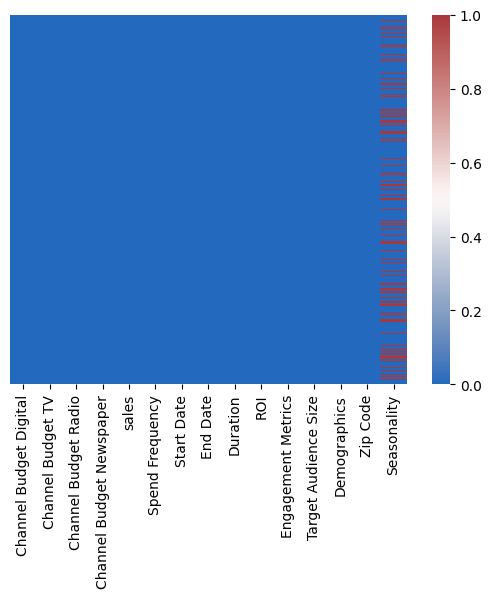

In [15]:
# Visualization 
sns.heatmap(mkt_df.isnull(), yticklabels=False, cbar=True, cmap='vlag')

<Axes: >

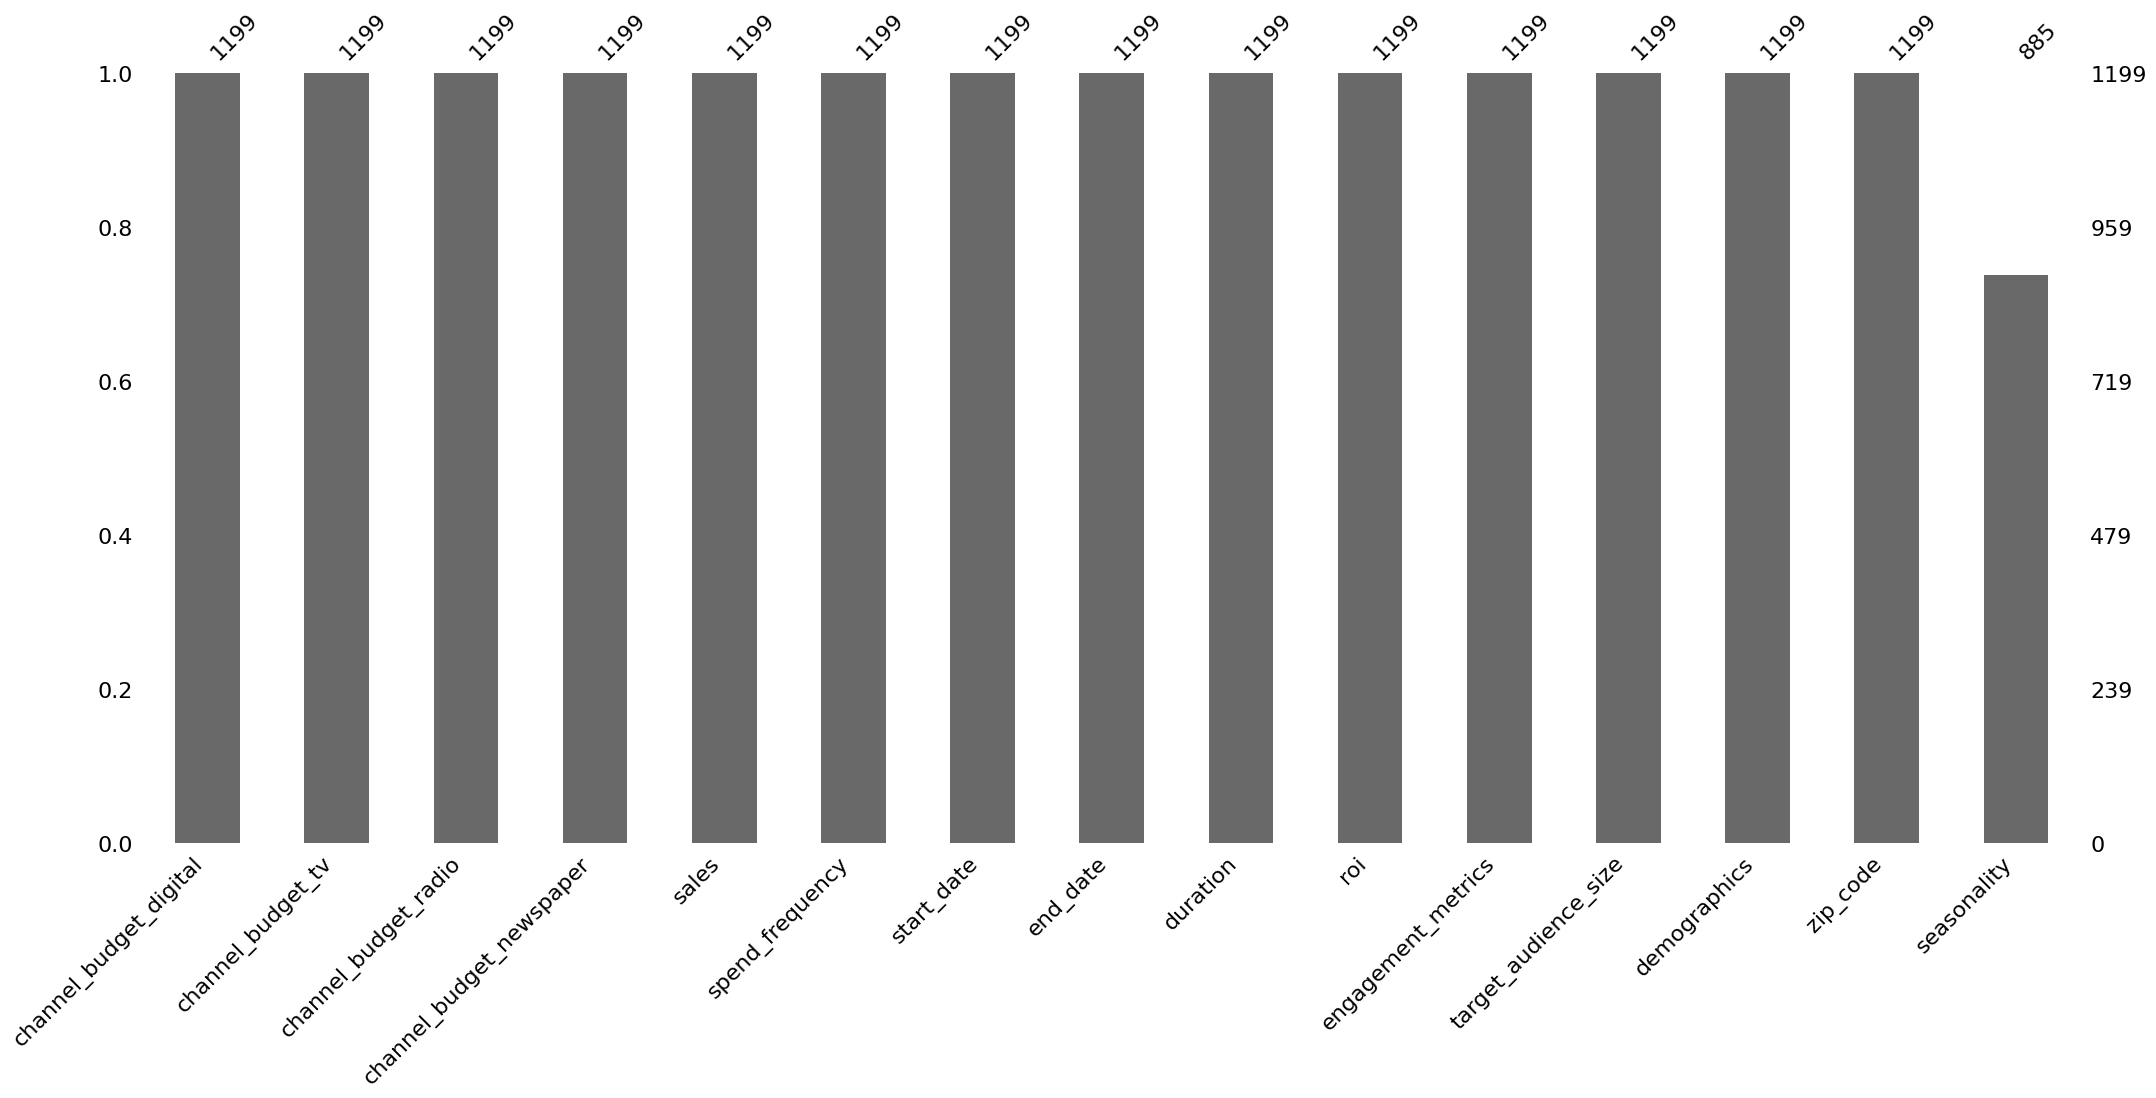

In [29]:
#Visualize the missing values
msno.bar(mkt_df)

#### Checking Duplicates

Result:

I do not have any rows that are duplicated so that is good to know 

In [18]:
mkt_df.duplicated().sum()

np.int64(0)

#### Checking Data Type

Result

- Shows all of the lowercase and underscore changes were made
- confirms the missing values for Seasonality
- Shows that we have 
    * 5 categorical features
    * 10 numeric features (6-float64 and 4-Int64)



In [19]:
# data types
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   channel_budget_digital    1199 non-null   float64
 1   channel_budget_tv         1199 non-null   float64
 2   channel_budget_radio      1199 non-null   float64
 3   channel_budget_newspaper  1199 non-null   float64
 4   sales                     1199 non-null   float64
 5   spend_frequency           1199 non-null   object 
 6   start_date                1199 non-null   object 
 7   end_date                  1199 non-null   object 
 8   duration                  1199 non-null   int64  
 9   roi                       1199 non-null   float64
 10  engagement_metrics        1199 non-null   int64  
 11  target_audience_size      1199 non-null   int64  
 12  demographics              1199 non-null   object 
 13  zip_code                  1199 non-null   int64  
 14  seasonal

#### Checking Categorical and Numerical Attributes

In [27]:
numeric_cols = mkt_df.select_dtypes(include = "number").columns
print(numeric_cols)

Index(['channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio',
       'channel_budget_newspaper', 'sales', 'duration', 'roi',
       'engagement_metrics', 'target_audience_size', 'zip_code'],
      dtype='object')


In [28]:
cat_cols = mkt_df.select_dtypes(include = "object").columns
print(cat_cols)

Index(['spend_frequency', 'start_date', 'end_date', 'demographics',
       'seasonality'],
      dtype='object')


In [21]:
# get the data type counts
dtype_counts = mkt_df.dtypes.value_counts()
print(dtype_counts)

float64    6
object     5
int64      4
Name: count, dtype: int64


#### Checking the Number of Unique Values of Each Column

```
channel_budget_digital       356
channel_budget_tv            195
channel_budget_radio         167
channel_budget_newspaper     172
sales                        121
spend_frequency                3
start_date                   353
end_date                     379
duration                      60
roi                         1199
engagement_metrics           684
target_audience_size        1193
demographics                   5
zip_code                     879
seasonality                    3

```

In [22]:
mkt_df.nunique()

channel_budget_digital       356
channel_budget_tv            195
channel_budget_radio         167
channel_budget_newspaper     172
sales                        121
spend_frequency                3
start_date                   353
end_date                     379
duration                      60
roi                         1199
engagement_metrics           684
target_audience_size        1193
demographics                   5
zip_code                     879
seasonality                    3
dtype: int64

#### Checking Statistics of Data Set

Results:

* Number of rows of data = 1199
* Number of Columns (i.e., features) = 15

In [26]:
mkt_df.shape

(1199, 15)

In [23]:
mkt_df.describe()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,duration,roi,engagement_metrics,target_audience_size,zip_code
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505,59.481234,1.748367,491.065888,54926.087573,93513.145121
std,135.730821,85.61047,14.820827,21.712507,5.202804,16.845793,0.731189,288.849725,26259.953527,1847.354920
min,0.300000,0.70000,0.000000,0.300000,1.600000,30.000000,0.502511,0.000000,10044.000000,90001.000000
25%,24.250000,73.40000,9.950000,12.800000,10.300000,46.000000,1.097243,238.500000,31911.000000,92112.000000
50%,64.650000,149.70000,22.500000,25.600000,12.900000,59.000000,1.738124,498.000000,54621.000000,93561.000000
75%,256.950000,218.50000,36.500000,45.100000,17.400000,74.000000,2.421896,736.000000,78036.500000,95324.500000
max,444.600000,296.40000,49.600000,114.000000,27.000000,89.000000,2.999729,999.000000,99679.000000,96148.000000


----

### Taking Care of Null Values

I see that `seasonality` is the only feature with missing values, so I do a deep dive on this feature and look to see how I might impute the null values. 

* I observe that there are 4 unique types
    * Summer
    * Holiday
    * Winter
    * Null

* I observe that `Winter` is the most dominant of the non-null values
    * Winter     313
    * Summer     300
    * Holiday    272
    * Null       314


I cannot just exclude seasonality as the percentage of useful data is significant enough
* Non-null percentage = (311+300+272)/1199 = ~74%
* Null percentage = 314/1199 = 26%

### Imputing the null value

To handle the null values. I create a new category: "Unknown" 

In [ ]:
# Seasonality is a categorical feature with the following features
mkt_df["seasonality"].unique()

array(['Summer', 'Holiday', 'Winter', nan], dtype=object)

In [32]:
# What is the most dominant of the 4
mkt_df["seasonality"].mode()[0]

'Winter'

In [33]:
# Getting the counts
mkt_df["seasonality"].value_counts()

seasonality
Winter     313
Summer     300
Holiday    272
Name: count, dtype: int64

In [38]:
fill_value = "Unknown"
mkt_df["seasonality"].fillna(fill_value, inplace=True)

<Axes: >

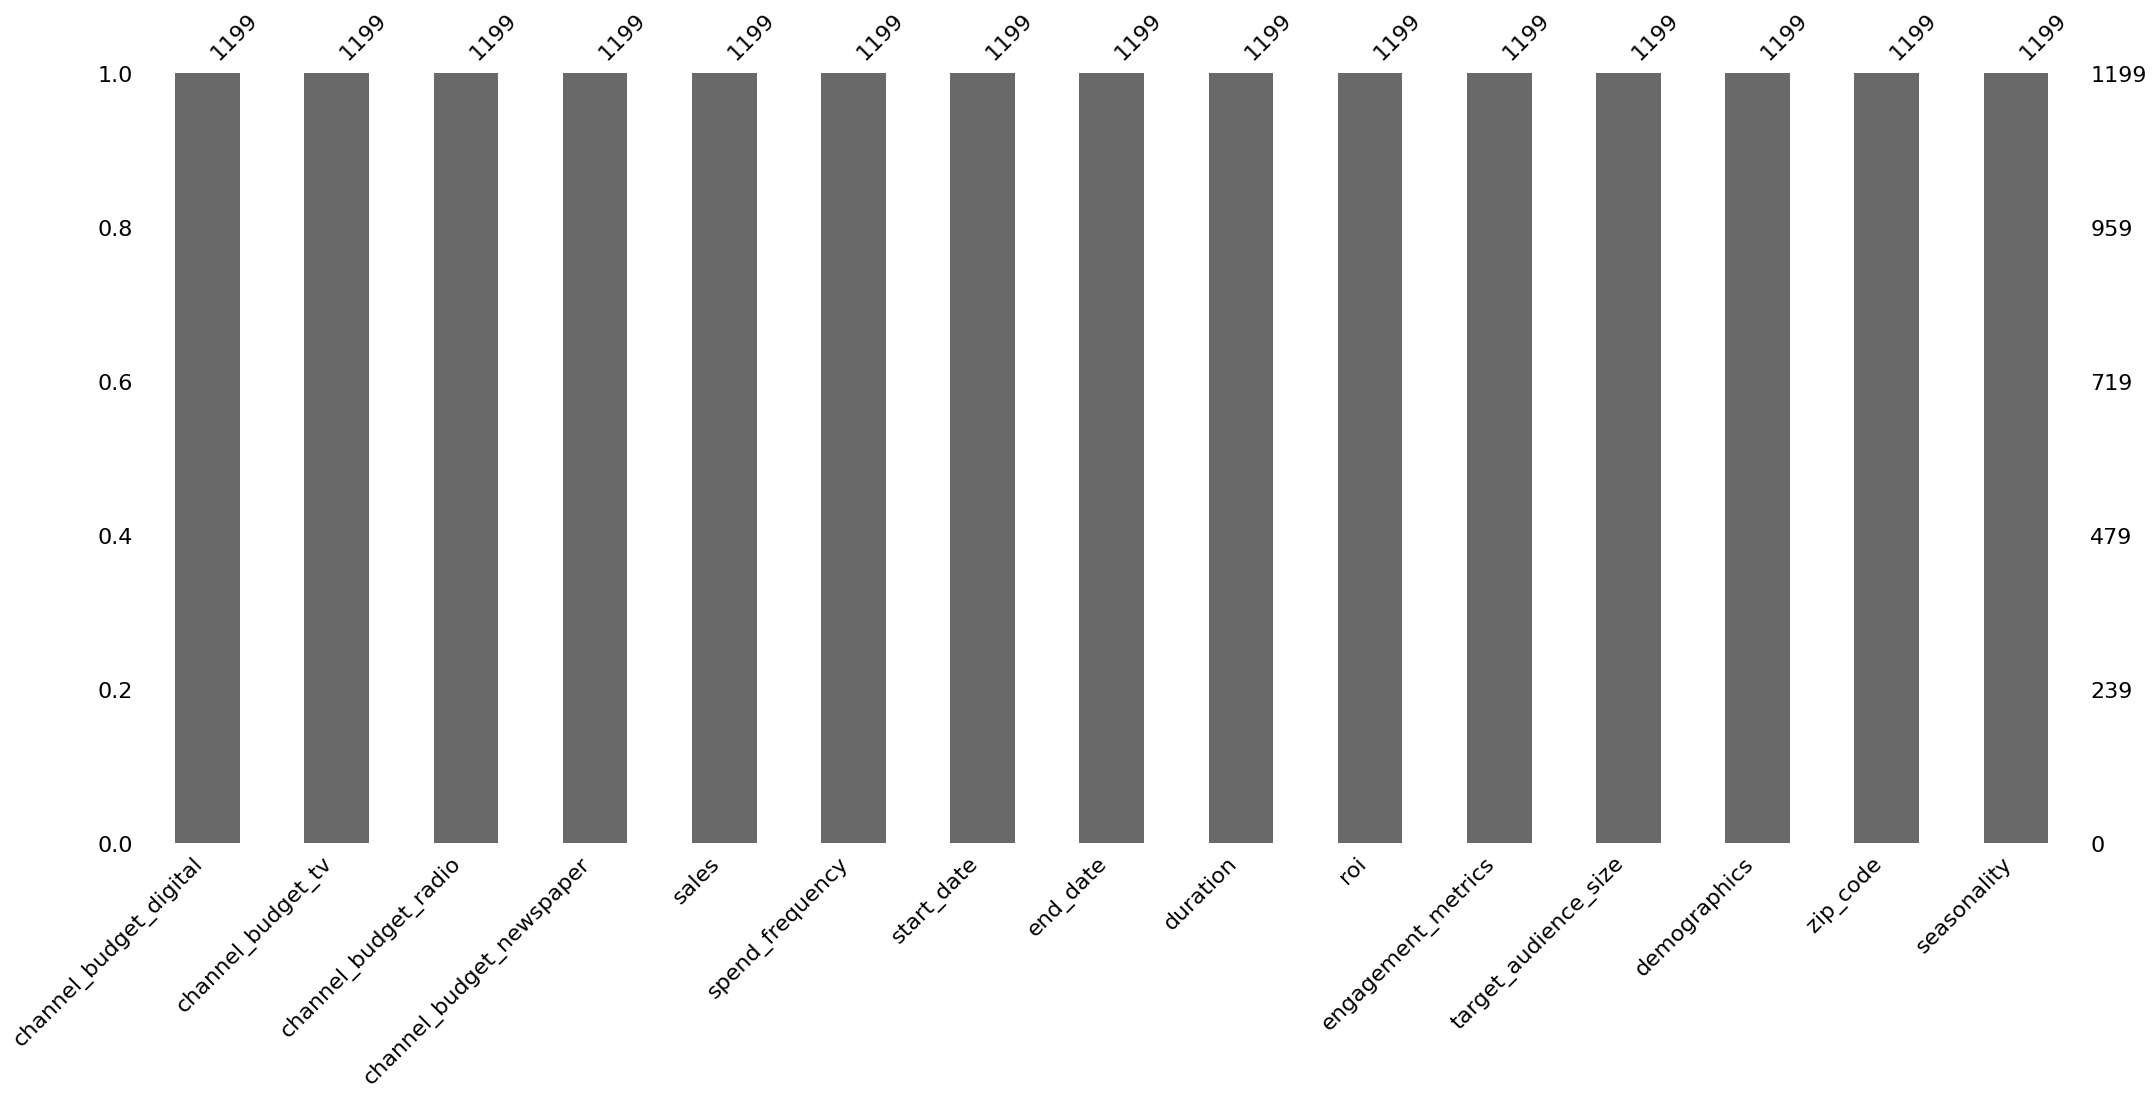

In [39]:
# Confirm that there are now no nulls
msno.bar(mkt_df)

----

### Converting the Date Columns to Datetime from Str Type

This conversion is necessary to facilitate time based analysis



In [40]:
mkt_df['start_date'] = pd.to_datetime(mkt_df['start_date'])
mkt_df['end_date'] = pd.to_datetime(mkt_df['end_date'])

----

### Handling Data Inconsistency

Right now, zip code is an integer. A really big one in most cases, which is not quite right. 

Here, I need to convert zip code to a str (object) type.


In [41]:
mkt_df["zip_code"] = mkt_df["zip_code"].astype(str)

In [43]:
# Check the type to see if it changed
print(mkt_df["zip_code"].dtype)

object


----

### Checking for Outliers 

Here, I want to visualize the distributions to identify outliers and better understand each features' values in case I need to perform some clipping/filtering of values.


#### Result

Fortunately, there were no extraordinary outlier values.


/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


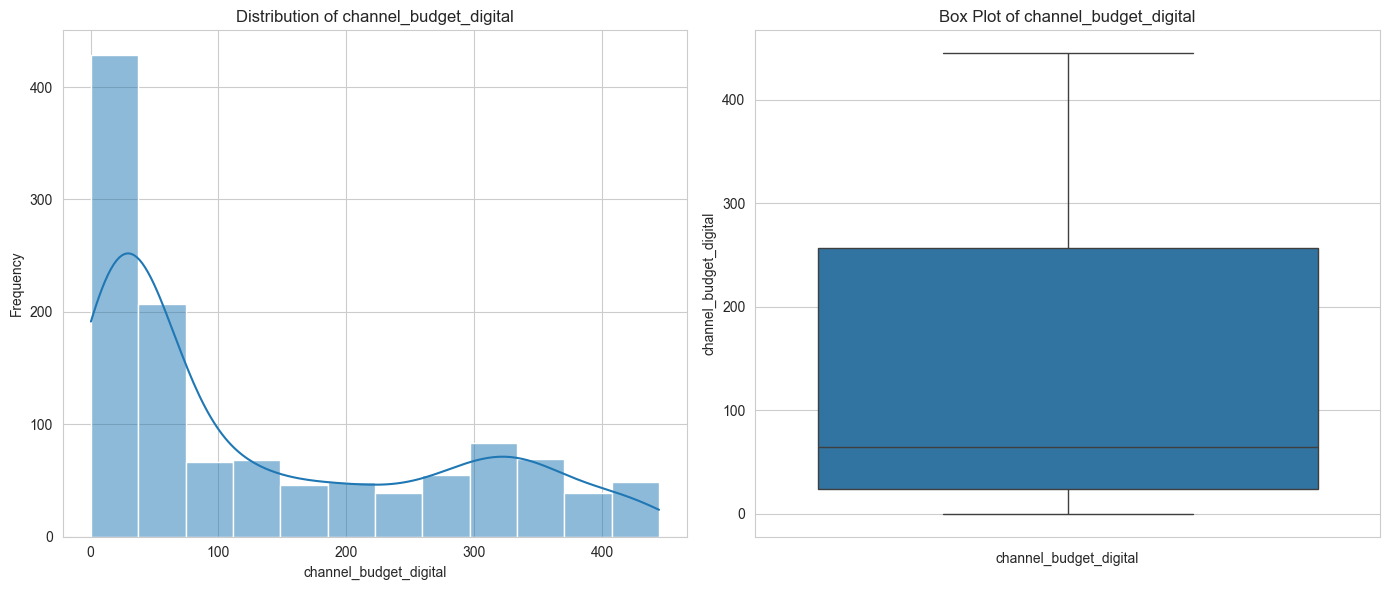

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


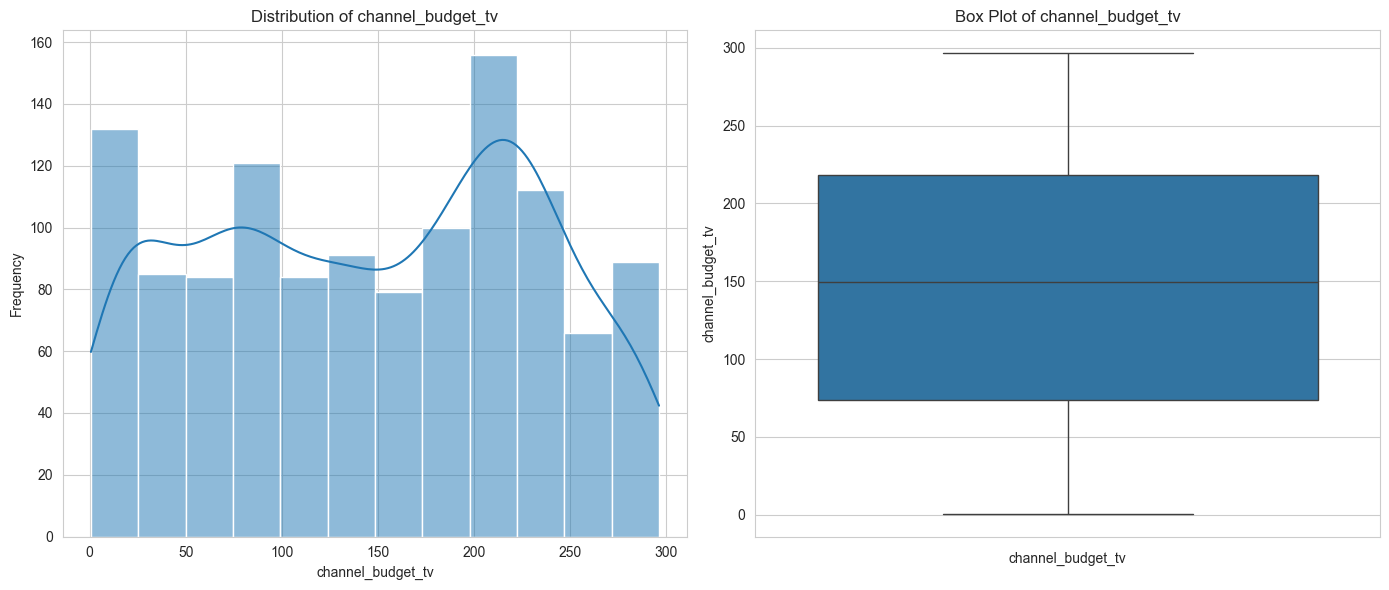

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


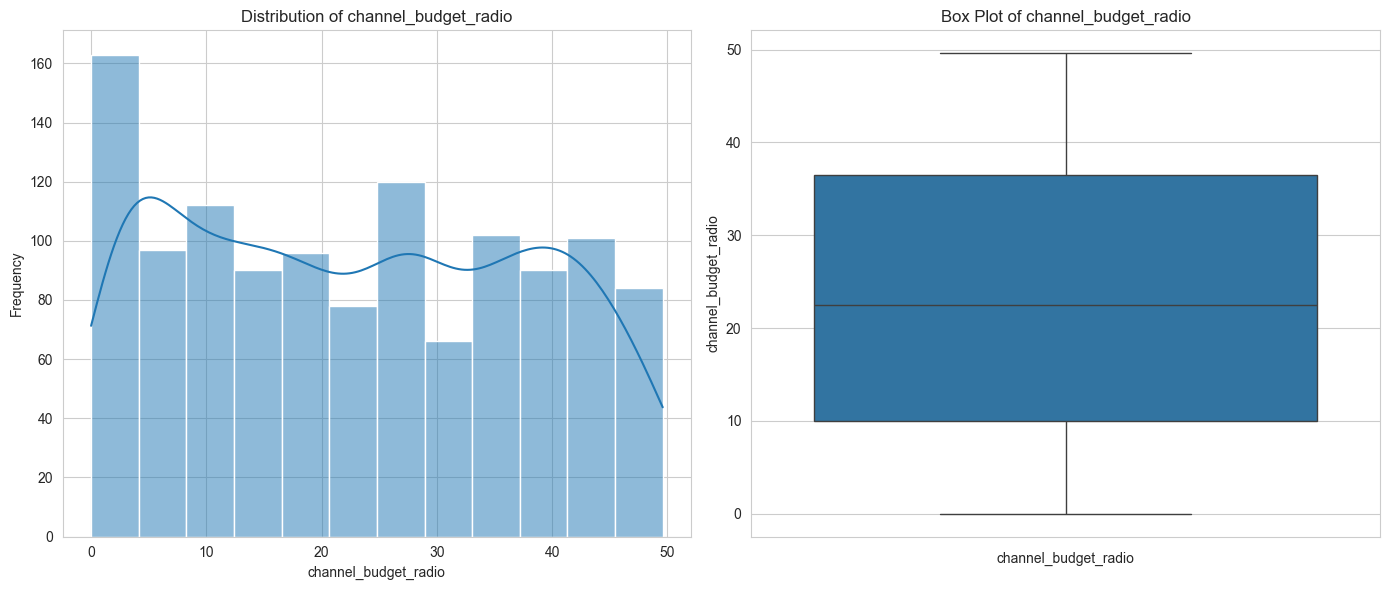

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


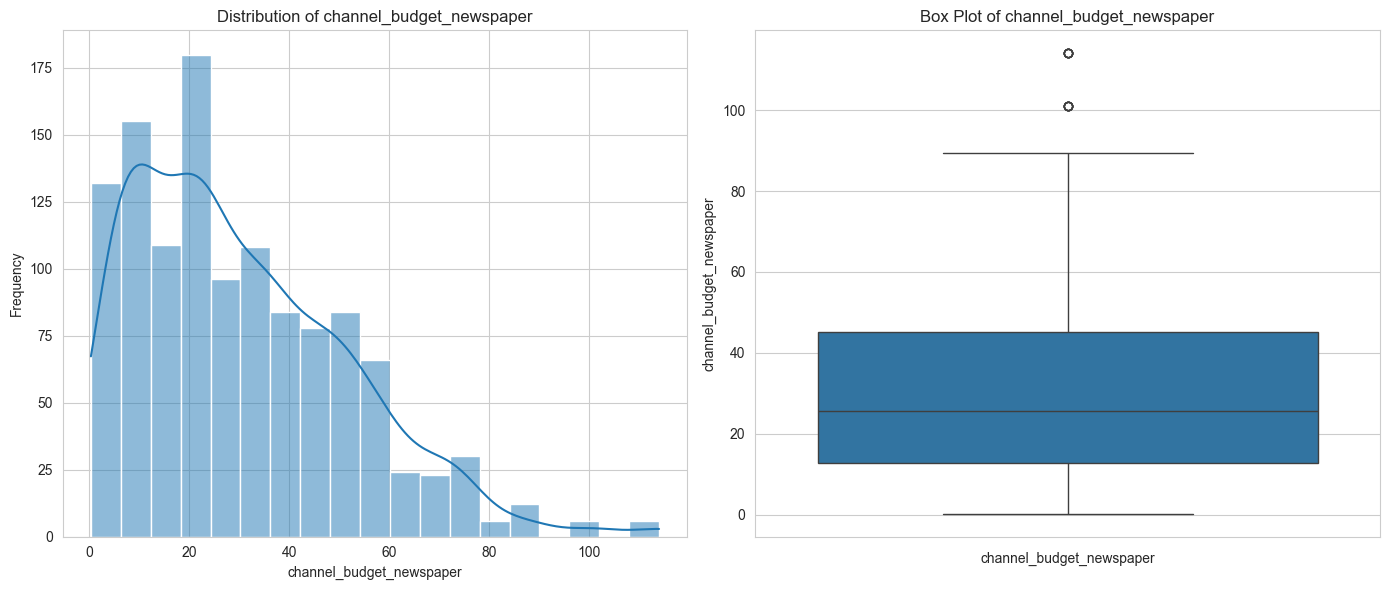

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


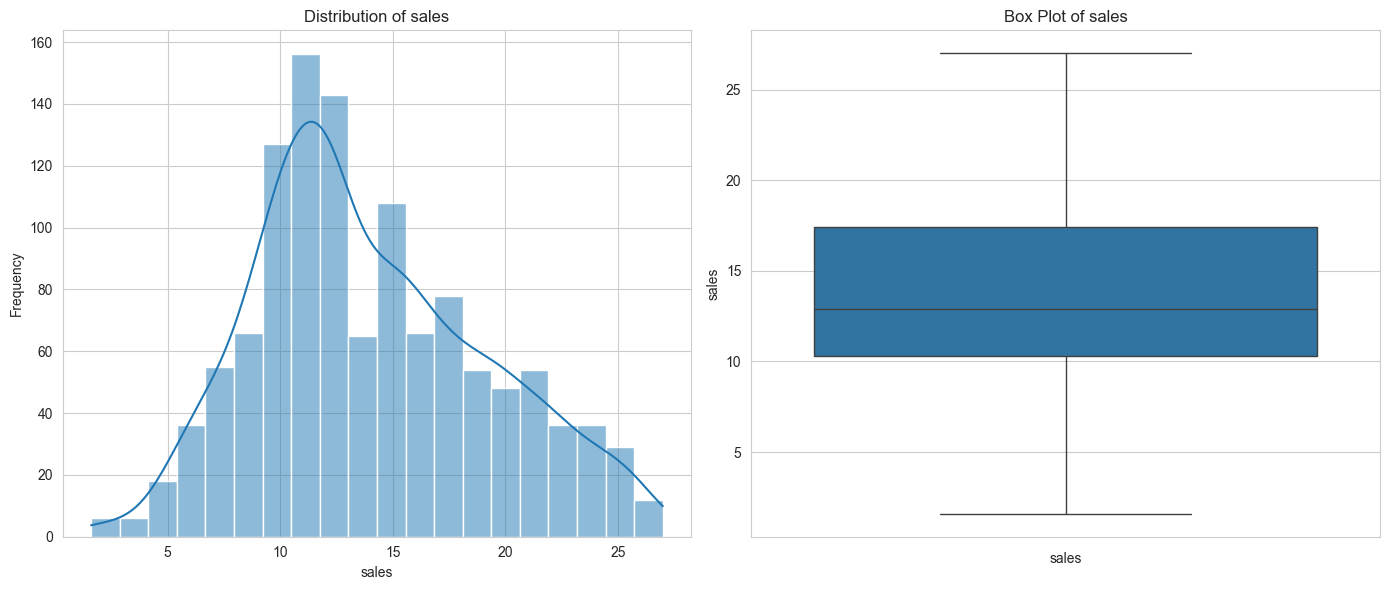

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


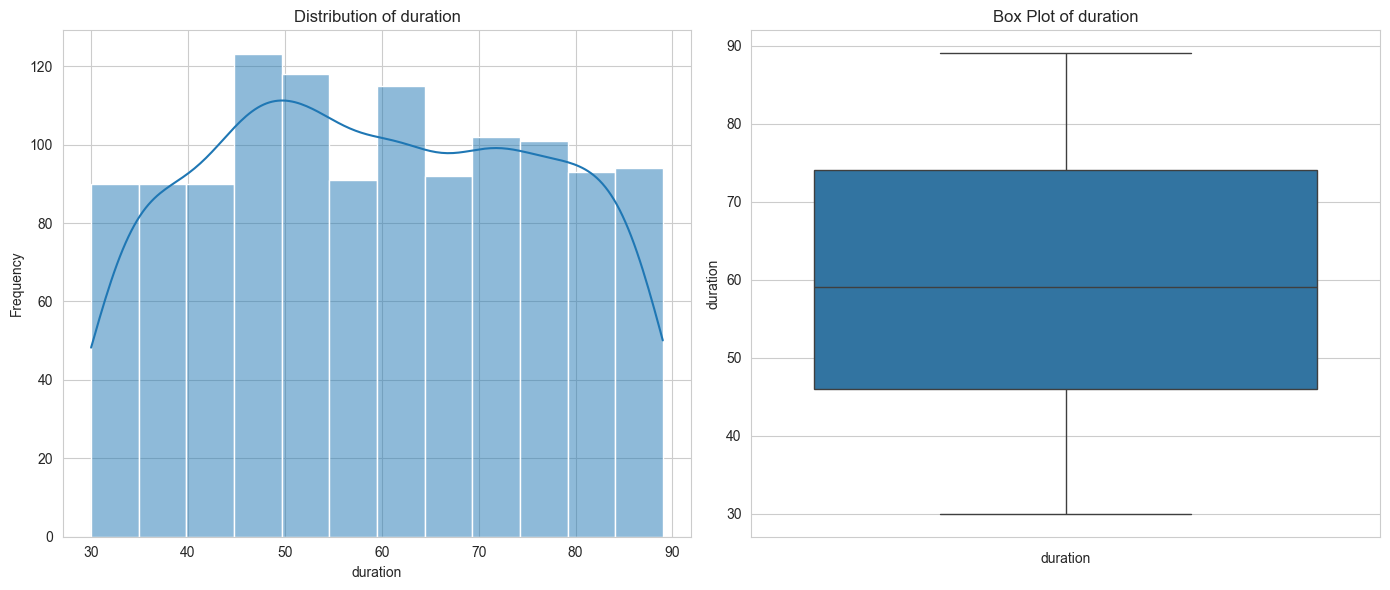

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


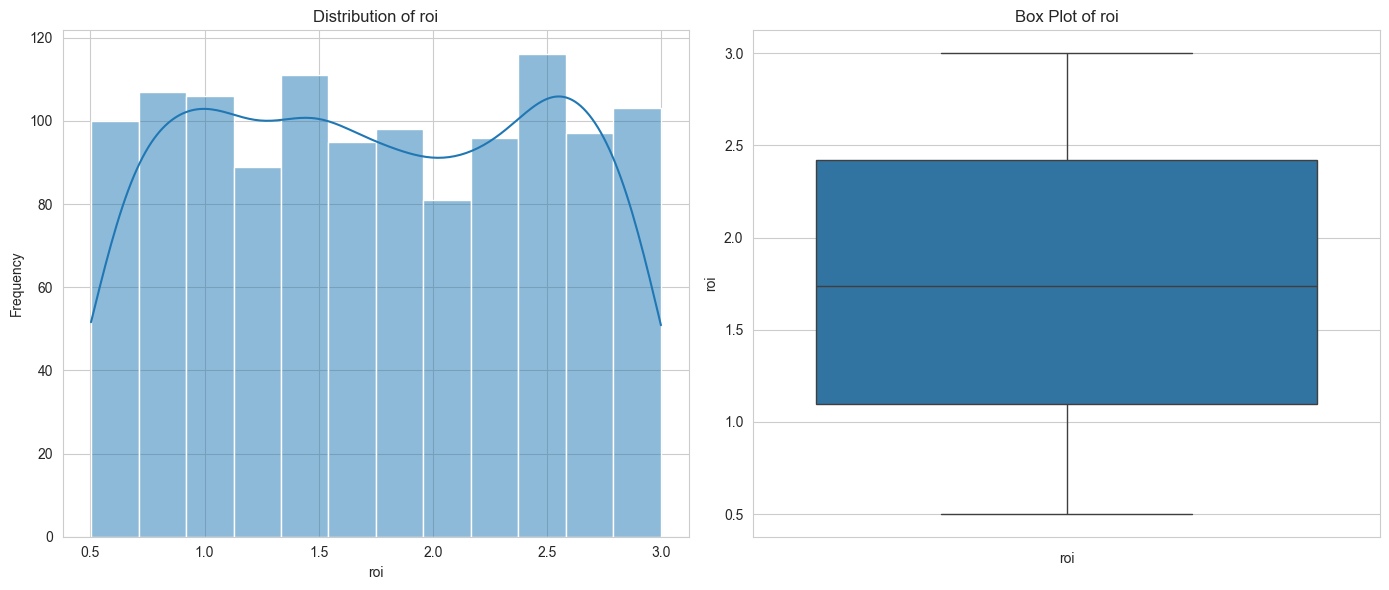

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


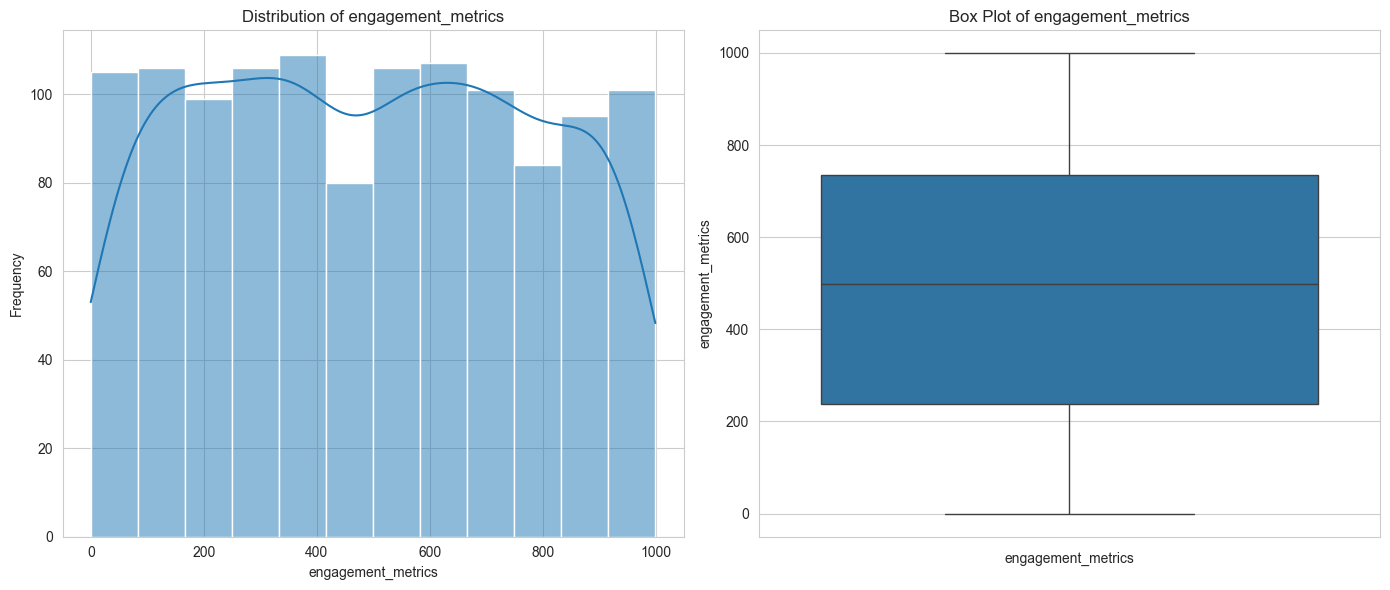

/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/lancehester/Documents/dl_predicting_media_channel_sales/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


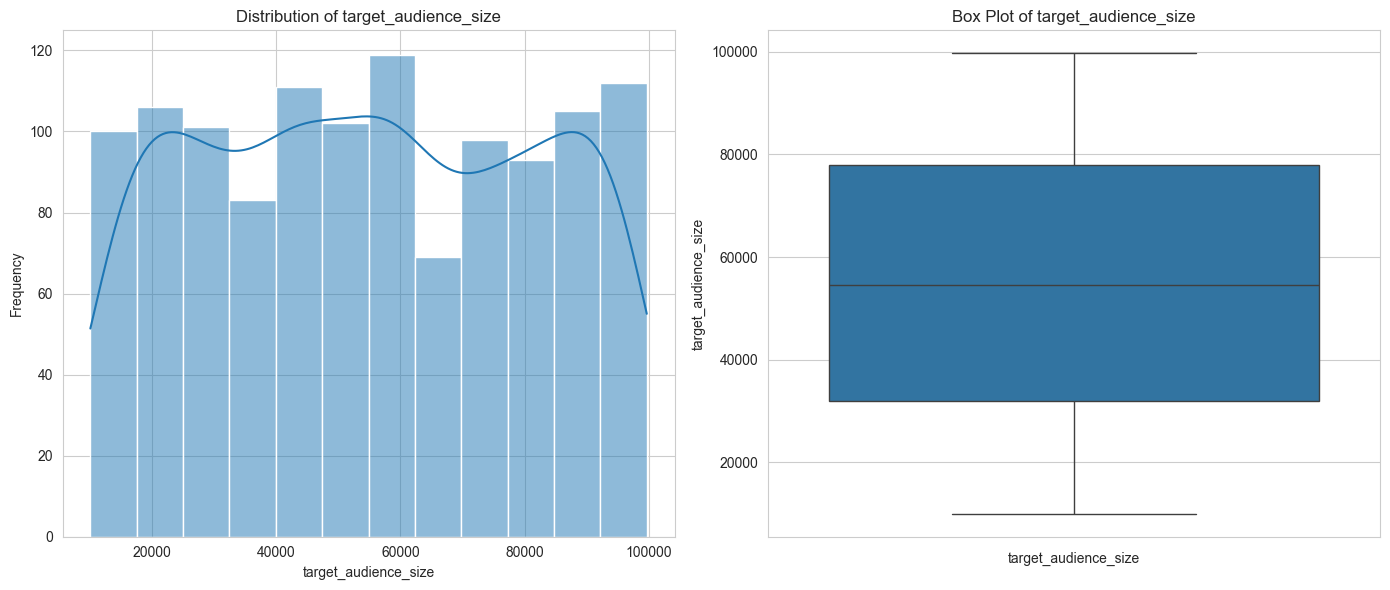

In [44]:
# Columns I want to visualize
cols_to_viz = [
    "channel_budget_digital", "channel_budget_tv", "channel_budget_radio",
    "channel_budget_newspaper", "sales", "duration", "roi",
    "engagement_metrics", "target_audience_size"
]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in cols_to_viz:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(mkt_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=mkt_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

---

## Performing Feature Engineering


* I perform some encoding of categorical features:
    * spend frequency 
    * demographics
    * seasonality

    
* Look at the correlation between features 
    * there is a low positive correlation between sales and channel_budget_digital
    * there is a strong positive correlation between sales and channel_budget_tv
    * there is a stable positive correlation between sales and channel_budget_radio
    * there is a stable positive correlation between channel_budget_digital and channel_budget_tv

As a result, I wanted to explore the Budget Allocations Across Channels to compare how budget is allocated across different channels.
* Allocations follow: 

```
channel_budget_tv > channel_budget_digital > channel_budget_newspaper > channel_budget_radio

```

which explains why sales are strongly positive with channel_budget_tv
    

In [46]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
mkt_df['spend_frequency'] = le.fit_transform(mkt_df['spend_frequency'])
mkt_df['demographics'] = le.fit_transform(mkt_df['demographics'])
mkt_df['seasonality'] = le.fit_transform(mkt_df['seasonality'])

In [47]:
mkt_df.head()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,spend_frequency,start_date,end_date,duration,roi,engagement_metrics,target_audience_size,demographics,zip_code,seasonality
0,345.15,156.0,37.8,69.2,22.1,1,2023-09-12,2023-11-13,62,2.271417,42,80012,3,93225,1
1,66.75,46.0,39.3,45.1,10.4,1,2023-10-26,2023-12-06,41,2.124524,461,63669,1,91206,0
2,25.80,18.3,45.9,69.3,9.3,2,2023-04-07,2023-05-25,48,2.221942,922,74670,1,92627,3
3,227.25,145.1,41.3,58.5,18.5,0,2023-11-19,2024-02-02,75,1.787010,38,38843,0,94553,0
4,271.20,165.2,10.8,58.4,12.9,2,2023-09-28,2023-11-20,53,2.604288,910,71040,4,93010,0


### Create Correlation Matrix

Visualize the correlation between numerical features to understand their relationships.

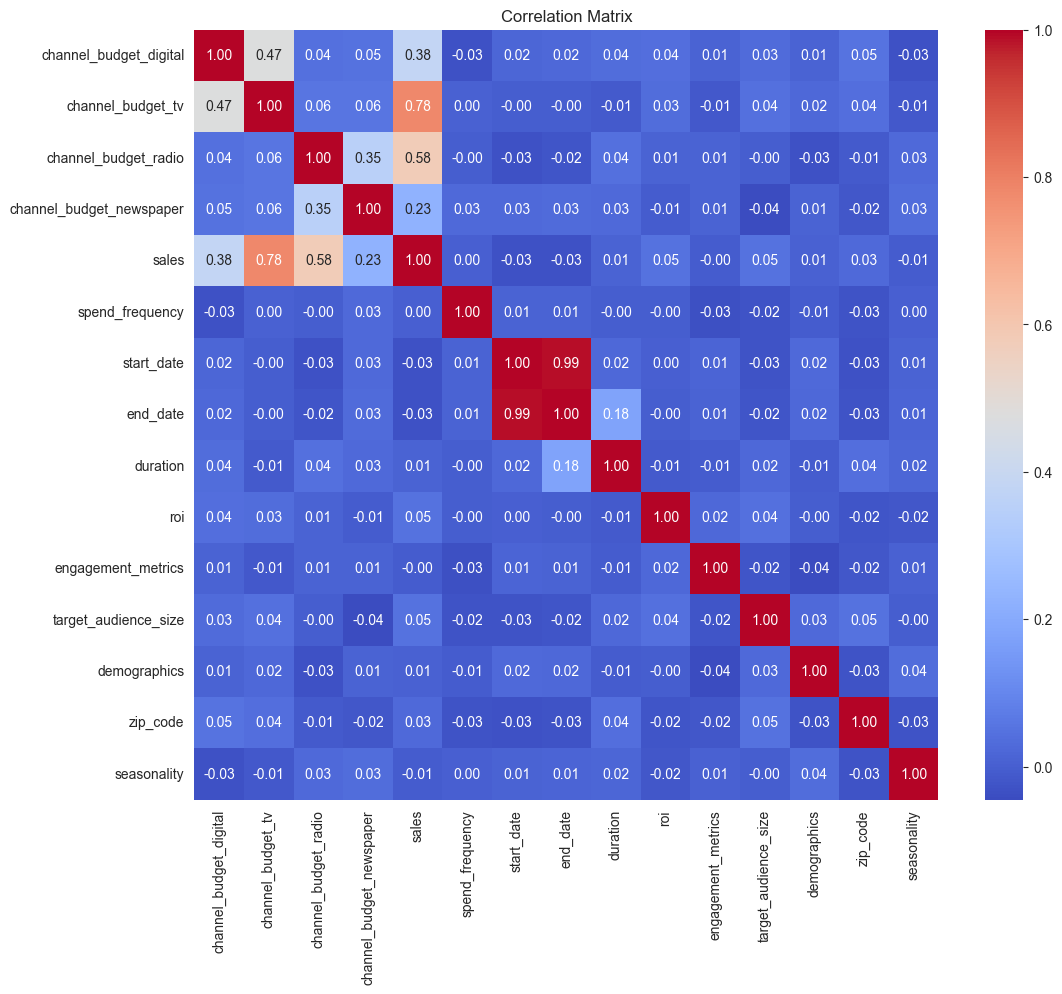

In [48]:
# Compute the correlation matrix
correlation_matrix = mkt_df.corr()

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Comparing how budgets are allocated across the different channels


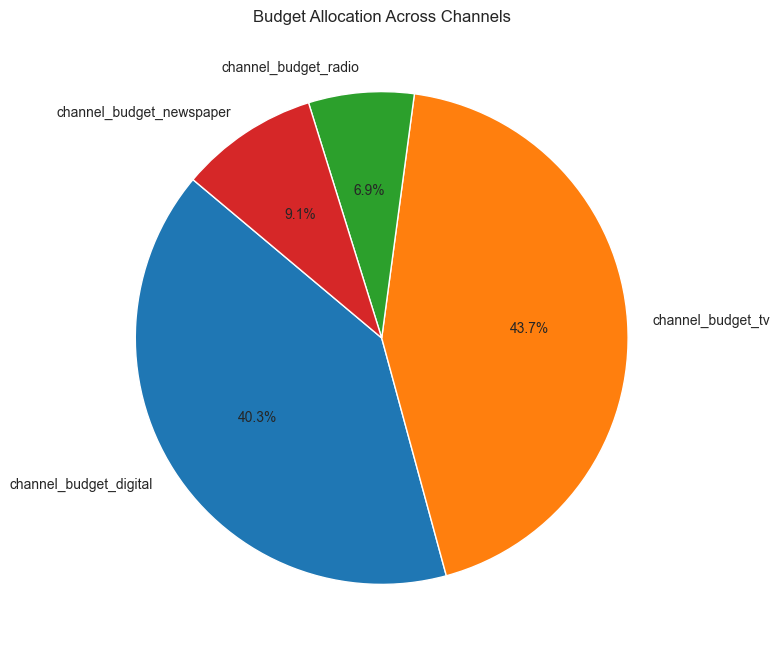

In [49]:
# Pie chart for budget allocation
budget_columns = ['channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio', 'channel_budget_newspaper']
budget_totals = mkt_df[budget_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(budget_totals, labels=budget_columns, autopct='%1.1f%%', startangle=140)
plt.title('Budget Allocation Across Channels')
plt.show()

----
----
# Saving the Processed Data

I save the processed data for construction of the prediction model in a future notebook

In [50]:
PROCESSED_DATA_PATH = ("/Users/lancehester/Documents/dl_predicting_media_channel_sales/data/clean_marketing_telecom.csv")


mkt_df.to_csv(PROCESSED_DATA_PATH, index=False)